https://arxiv.org/pdf/1704.04110.pdf

https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014

In [1]:
import pandas as pd

d = pd.read_csv('LD2011_2014.txt', sep=';', thousands=',', index_col=0)
d.shape

(140256, 370)

In [2]:
d.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2011-01-01 00:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2011-01-01 00:45:00,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2011-01-01 01:15:00,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


In [3]:
# all observations are 15 minute intervals
pd.Series(d.index).diff().unique()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [4]:
for c in d.columns:
    d[c] = d[c].astype(float)
d.dtypes

MT_001    float64
MT_002    float64
MT_003    float64
MT_004    float64
MT_005    float64
           ...   
MT_366    float64
MT_367    float64
MT_368    float64
MT_369    float64
MT_370    float64
Length: 370, dtype: object

In [5]:
d.index.min(), d.index.max()

('2011-01-01 00:15:00', '2015-01-01 00:00:00')

In [6]:
d.shape

(140256, 370)

In [7]:
d.sum(axis=0)

MT_001    1.899547e+19
MT_002    2.755961e+19
MT_003    2.490666e+19
MT_004    5.058810e+19
MT_005    4.527706e+19
              ...     
MT_366    4.462558e+19
MT_367    5.406011e+19
MT_368    3.381737e+19
MT_369    6.853980e+19
MT_370    1.331800e+19
Length: 370, dtype: float64

In [8]:
d.isnull().any().any()

False

# feature engineering

In [9]:
# d['day_of_week'] = d.index.dt.
d.index = pd.to_datetime(d.index)
d['day_of_week'] = d.index.dayofweek
d['hour'] = d.index.hour
d['month'] = d.index.month
d['week_of_year'] = d.index.weekofyear
d.head()


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,day_of_week,hour,month,week_of_year
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,0,1,52
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,0,1,52
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,0,1,52
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,1,1,52
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,1,1,52


In [10]:
assert not d.isnull().any().any()

In [11]:
# d.sum(axis=0)

In [42]:
import numpy as np

# 7 days of context to predict one day of outcomes
condition_length = 96 * 7
prediction_length = 96

categorical_features = [
    'day_of_week', 'hour', 'month', 'week_of_year'
]

def get_categorical_features(d):
    return d[categorical_features].values[np.newaxis, :, :]

def get_time_series_features(d):
    return d.drop(categorical_features, axis=1).T.values[:, :, np.newaxis]

def feature_extraction(d, condition_length=condition_length):
    d_condition = d.iloc[:condition_length]
    d_prediction = d.iloc[condition_length:-1]
    d_y = d.iloc[condition_length + 1:]
    
    x_condition = get_categorical_features(d_condition)
    x_prediction = get_categorical_features(d_prediction)
    
    z_condition = get_time_series_features(d_condition)
    z_prediction = get_time_series_features(d_prediction)
    y = get_time_series_features(d_y)
    
    scale_factor = 1 + z_condition.sum(axis=(1, 2)).reshape((-1, 1, 1))
    
    return {
        'x_condition': x_condition.astype(float),
        'z_condition': z_condition / scale_factor,
        'x_prediction': x_prediction.astype(float),
        'z_prediction': z_prediction / scale_factor
    }, y / scale_factor

def get_training_example(d):
    i = np.random.randint(370)  # TODO: don't hard code number of clients
    first_nonzero = np.argwhere(d.iloc[:, i] > 0)[0][0]
    t_0 = np.random.randint(np.argwhere(d.iloc[:, 0] > 0)[0][0], len(d) - (prediction_length + 1))
    d_sample = d[t_0:t_0 + condition_length + prediction_length + 1]  # TODO: parameterize
    return feature_extraction(d_sample[[d_sample.columns[i]] + categorical_features])

def get_batch(d, batch_size):
    training_examples = [get_training_example(d) for _ in range(batch_size)]
    return {
        'x_condition': np.concatenate([t[0]['x_condition'] for t in training_examples]),
        'z_condition': np.concatenate([t[0]['z_condition'] for t in training_examples]),
        'x_prediction': np.concatenate([t[0]['x_prediction'] for t in training_examples]),
        'z_prediction': np.concatenate([t[0]['z_prediction'] for t in training_examples]),
    }, np.concatenate([t[1] for t in training_examples])
        

In [47]:
get_training_example(d)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


({'x_condition': array([[[ 0., 17.,  3., 13.],
          [ 0., 17.,  3., 13.],
          [ 0., 17.,  3., 13.],
          ...,
          [ 0., 16.,  4., 14.],
          [ 0., 16.,  4., 14.],
          [ 0., 17.,  4., 14.]]]),
  'x_prediction': array([[[ 0., 17.,  4., 14.],
          [ 0., 17.,  4., 14.],
          [ 0., 17.,  4., 14.],
          [ 0., 18.,  4., 14.],
          [ 0., 18.,  4., 14.],
          [ 0., 18.,  4., 14.],
          [ 0., 18.,  4., 14.],
          [ 0., 19.,  4., 14.],
          [ 0., 19.,  4., 14.],
          [ 0., 19.,  4., 14.],
          [ 0., 19.,  4., 14.],
          [ 0., 20.,  4., 14.],
          [ 0., 20.,  4., 14.],
          [ 0., 20.,  4., 14.],
          [ 0., 20.,  4., 14.],
          [ 0., 21.,  4., 14.],
          [ 0., 21.,  4., 14.],
          [ 0., 21.,  4., 14.],
          [ 0., 21.,  4., 14.],
          [ 0., 22.,  4., 14.],
          [ 0., 22.,  4., 14.],
          [ 0., 22.,  4., 14.],
          [ 0., 22.,  4., 14.],
          [ 0., 23.,  4

In [63]:
b_x, b_y = get_batch(d, 32)
b_x['x_condition'].shape, b_x['z_condition'].shape, b_x['z_prediction'].shape, b_y.shape

/Users/dgates/venvs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


((32, 672, 4), (32, 672, 1), (32, 96, 1), (32, 96, 1))

In [75]:
assert (b_x['z_prediction'][:, 1:, :] == b_y[:, :-1, :]).all()

In [50]:
# d1, d2 = get_training_example(d), get_training_example(d)

In [38]:
# np.concatenate([d1[0]['x_condition'], d2[0]['x_condition']]).shape

(2, 672, 4)

In [ ]:
# import numpy as np

# categorical_features = [
#     'day_of_week', 'hour', 'month', 'week_of_year'
# ]

# condition_start, condition_stop = 120000, 120200
# prediction_start, prediction_stop = condition_stop, condition_stop + 100

# x_train_condition = d.iloc[condition_start:condition_stop][categorical_features].values
# x_train_condition = np.tile(x_train_condition, (d.shape[1] - 4, 1, 1))
# z_train_condition = d.iloc[condition_start:condition_stop].drop(categorical_features, axis=1).T.values[:, :, np.newaxis]

# x_train_prediction = d.iloc[prediction_start:prediction_stop][categorical_features].values
# x_train_prediction = np.tile(x_train_prediction, (d.shape[1] - 4, 1, 1))
# z_train_prediction = d.iloc[prediction_start:prediction_stop].drop(categorical_features, axis=1).T.values[:, :, np.newaxis]

# scale_factor = 1 + z_train_condition.sum(axis=(1, 2)).reshape((-1, 1, 1))  # TODO: handle divide-by-0 without 1e-6

# x_train = {
#     'x_condition': x_train_condition.astype(float),
#     'z_condition': z_train_condition / scale_factor,
#     'x_prediction': x_train_prediction.astype(float),
#     'z_prediction': z_train_prediction / scale_factor
# }
# y_train = d.iloc[prediction_start + 1:prediction_stop + 1].drop(categorical_features, axis=1).T.values[:, :, np.newaxis]
# y_train = y_train / scale_factor

In [ ]:
# {k: v.shape for k, v in x_train.items()}, y_train.shape

In [ ]:
# x_train['z_condition']

In [ ]:
# y_train

# model

In [239]:
import math
import tensorflow as tf

pi = tf.constant(math.pi)

def guassian_loss(z, model_outputs):
    mu, sigma = model_outputs[:, :, 0], model_outputs[:, :, 1]
    # need to keep three dimensions when we slice here
    mu, sigma = tf.keras.backend.expand_dims(mu), tf.keras.backend.expand_dims(sigma) + 1e-6
    return (1 / tf.math.sqrt(2 * pi * sigma ** 2)) * tf.exp(-1 * (((z - mu) ** 2) / (2 * sigma ** 2)))

def train_loss(z, model_outputs):
    return -tf.math.log(guassian_loss(z, model_outputs) + 1e-9)

batch_norm = tf.keras.layers.BatchNormalization()

x_condition_input = tf.keras.Input((None, 4), name='x_condition')
x_condition = batch_norm(x_condition_input)
z_condition = tf.keras.Input((None, 1), name='z_condition')
input_condition = tf.keras.layers.Concatenate()([x_condition, z_condition])

x_prediction_input = tf.keras.Input((None, 4), name='x_prediction')
x_prediction = batch_norm(x_prediction_input)
z_prediction = tf.keras.Input((None, 1), name='z_prediction')
input_prediction = tf.keras.layers.Concatenate()([x_prediction, z_prediction])

encoder_sequences1 = tf.keras.layers.LSTM(512, return_sequences=True)(input_condition)
_, *encoder2_state = tf.keras.layers.LSTM(512, return_state=True)(input_condition)
decoder1_sequences = tf.keras.layers.LSTM(512, return_sequences=True)(input_prediction, initial_state=encoder2_state)
decoder2_sequences = tf.keras.layers.LSTM(512, return_sequences=True)(decoder1_sequences)

W_mu = tf.keras.layers.Dense(1, name='W_mu')
W_sigma = tf.keras.layers.Dense(1, activation='softplus', name='W_sigma')
mu, sigma = W_mu(decoder2_sequences), W_sigma(decoder2_sequences)

dist_params = tf.keras.layers.Concatenate()([mu, sigma])

model = tf.keras.models.Model(inputs=[x_condition_input, z_condition, x_prediction_input, z_prediction], outputs=dist_params)
model.compile(loss=train_loss, optimizer='adam')

In [240]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_prediction (InputLayer)       [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
x_condition (InputLayer)        [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, None, 4)      16          x_condition[0][0]                
                                                                 x_prediction[0][0]               
__________________________________________________________________________________________________
z_condition (InputLayer)        [(None, None, 1)]    0                                      

In [171]:
# last = [None]
# def gen(x, y, batch_size):
#     while True:
#         for i in range(len(y) // batch_size):
#             start, stop = i * batch_size, (i + 1) * batch_size
#             x_batch = {k: v[start:stop] for k, v in x.items()}
#             y_batch = y[start:stop]
#             last[0] = x_batch, y_batch
#             yield x_batch, y_batch


In [172]:
def gen(d, batch_size):
    while True:
        try:
            x_batch, y_batch = get_batch(d, batch_size)
            yield x_batch, y_batch
        except Exception:
            pass

In [ ]:
callbacks = model.fit(gen(d, 32), steps_per_epoch=100, epochs=10, callbacks=[tf.keras.callbacks.TerminateOnNaN()])

/Users/dgates/venvs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Train for 100 steps
Epoch 1/10


In [215]:
callbacks = model.fit(gen(d, 32), steps_per_epoch=100, epochs=10, callbacks=[tf.keras.callbacks.TerminateOnNaN()])

/Users/dgates/venvs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Train for 100 steps
Epoch 1/10
100/100 [==============================] - 416s 4s/step - loss: -0.6314
Epoch 2/10
100/100 [==============================] - 416s 4s/step - loss: -0.4002
Epoch 3/10
100/100 [==============================] - 480s 5s/step - loss: -0.5435
Epoch 4/10
100/100 [==============================] - 465s 5s/step - loss: -0.3567
Epoch 5/10
100/100 [==============================] - 445s 4s/step - loss: -0.9366
Epoch 6/10
100/100 [==============================] - 410s 4s/step - loss: 0.3667
Epoch 7/10
100/100 [==============================] - 421s 4s/step - loss: -0.7321
Epoch 8/10
100/100 [==============================] - 469s 5s/step - loss: -0.4652
Epoch 9/10
100/100 [==============================] - 468s 5s/step - loss: -0.8477
Epoch 10/10
100/100 [==============================] - 452s 5s/step - loss: -0.7690


In [228]:
x_test, y_test = get_batch(d, 50)   # TODO: not true test cases
p = model.predict(x_test)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


32


<ErrorbarContainer object of 3 artists>

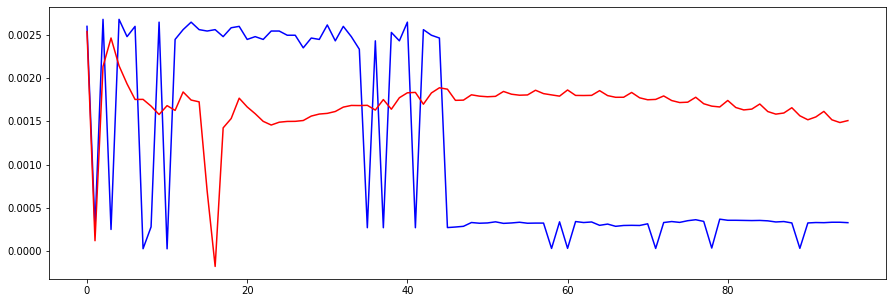

In [238]:
import scipy.stats as ss
import matplotlib.pyplot as plt

i = np.random.randint(len(p))
print(i)
params_it = p[i]
dist_it = ss.norm(params_it[:, 0], params_it[:, 1])
mean_it = dist_it.mean()
low_it = dist_it.ppf(0.1)
high_it = dist_it.ppf(0.9)
y_it = y_test[i].reshape(-1)
n = y_test.shape[-2]

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(np.arange(n), y_it, color='b')
plt.errorbar(np.arange(n), mean_it, color='r')
# plt.errorbar(np.arange(n), mean_it, color='r', yerr=[np.abs(low_it), high_it])
# plt.plot(np.arange(n), low_it)
# plt.plot(np.arange(n), high_it)

In [196]:
params_it[0, 0], params_it[0, 1], dist_it.ppf(0.1)[0]

(0.004496951, 0.24385855, -0.3080203502997305)

In [133]:
y_test[i].reshape(-1)

array([5.62901891e-04, 5.50925255e-04, 5.98831799e-04, 5.68890209e-04,
       5.03018711e-04, 4.85053757e-04, 4.73077121e-04, 4.43135531e-03,
       4.07205623e-03, 3.95228987e-03, 3.65287397e-03, 3.53310761e-03,
       3.71275715e-03, 3.77264033e-03, 3.65287397e-03, 3.41334125e-03,
       3.23369171e-04, 2.93427581e-03, 3.11392535e-03, 3.17380853e-04,
       3.23369171e-04, 2.99415899e-03, 2.99415899e-03, 2.87439263e-03,
       3.11392535e-03, 3.23369171e-04, 3.23369171e-04, 2.99415899e-03,
       2.87439263e-03, 2.99415899e-03, 3.11392535e-03, 3.23369171e-04,
       3.23369171e-04, 2.27556084e-03, 2.39532720e-04, 3.11392535e-03,
       3.65287397e-03, 4.25170577e-03, 4.61100485e-04, 5.03018711e-04,
       5.44936937e-04, 5.68890209e-04, 5.56913573e-04, 5.68890209e-04,
       5.86855163e-04, 5.09007029e-04, 5.56913573e-04, 5.26971983e-04,
       5.80866845e-04, 5.68890209e-04, 5.50925255e-04, 6.52726661e-05,
       5.68890209e-04, 5.92843481e-04, 6.40750025e-04, 6.04820117e-04,
      